- *Method chaining* (encadeamento de métodos)
	- `.assign()`
	- `.pipe()`
- `for` vs *List comprehension*
- Usando `.apply()`
- `.apply(axis = 0)`
- Barra de progresso usando `tqdm` 
- Pandas Profiling para exploração dos dados e para garantir a qualidade dos dados
- Mostrar o dataframe usando o `style`
- Copiar e colar no Excel `.to_clipboard()`
- __Funções de janela móvel (*window functions*)__
- Fechamento 2o projeto

# Funções de janela móvel (*window functions*)

In [24]:
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
sensor_data = pd.read_csv('./input/sensor-data.csv')

In [26]:
sensor_data.head(1)

,time,power,temp,humidity,light,CO2,dust
0,2015-08-01 00:00:28,0.0,32,40,0,973,27.8


In [27]:
sensor_data[sensor_data.time.duplicated(keep=False)]

,time,power,temp,humidity,light,CO2,dust
43508,2015-08-16 05:08:23,0.0,34,32,0,2000,43.64
43509,2015-08-16 05:08:23,0.0,34,32,0,2000,54.36
43510,2015-08-16 05:08:23,0.0,34,32,0,2000,57.40
43511,2015-08-16 05:08:23,0.0,34,32,0,2000,49.35
43512,2015-08-16 05:08:23,0.0,34,32,0,2000,39.61
43513,2015-08-16 05:08:23,0.0,34,32,0,2000,65.51
43514,2015-08-16 05:08:23,0.0,34,32,0,2000,31.15
43515,2015-08-16 05:08:23,0.0,34,32,0,2000,43.14
43516,2015-08-16 05:08:23,0.0,34,32,0,2000,47.55


In [28]:
# keep: Union[str, bool] = 'first'
sensor_data = sensor_data.drop_duplicates(subset='time', keep='first')

In [29]:
sensor_data[sensor_data['time'] == '2015-08-16 05:08:23']

,time,power,temp,humidity,light,CO2,dust
43508,2015-08-16 05:08:23,0.0,34,32,0,2000,43.64


In [30]:
sensor_data = (sensor_data
                   .assign(time = pd.to_datetime(sensor_data['time']))
                   .set_index('time'))

In [31]:
sensor_data

,power,temp,humidity,light,CO2,dust
time,,,,,,
2015-08-01 00:00:28,0.0,32,40,0,973,27.80
2015-08-01 00:00:58,0.0,32,40,0,973,27.09
2015-08-01 00:01:28,0.0,32,40,0,973,34.50
2015-08-01 00:01:58,0.0,32,40,0,973,28.43
2015-08-01 00:02:28,0.0,32,40,0,973,27.58
...,...,...,...,...,...,...
2015-08-31 23:57:40,0.0,34,29,0,2000,0.00
2015-08-31 23:58:10,0.0,34,29,0,2000,2.61
2015-08-31 23:58:40,0.0,34,29,0,2000,3.38


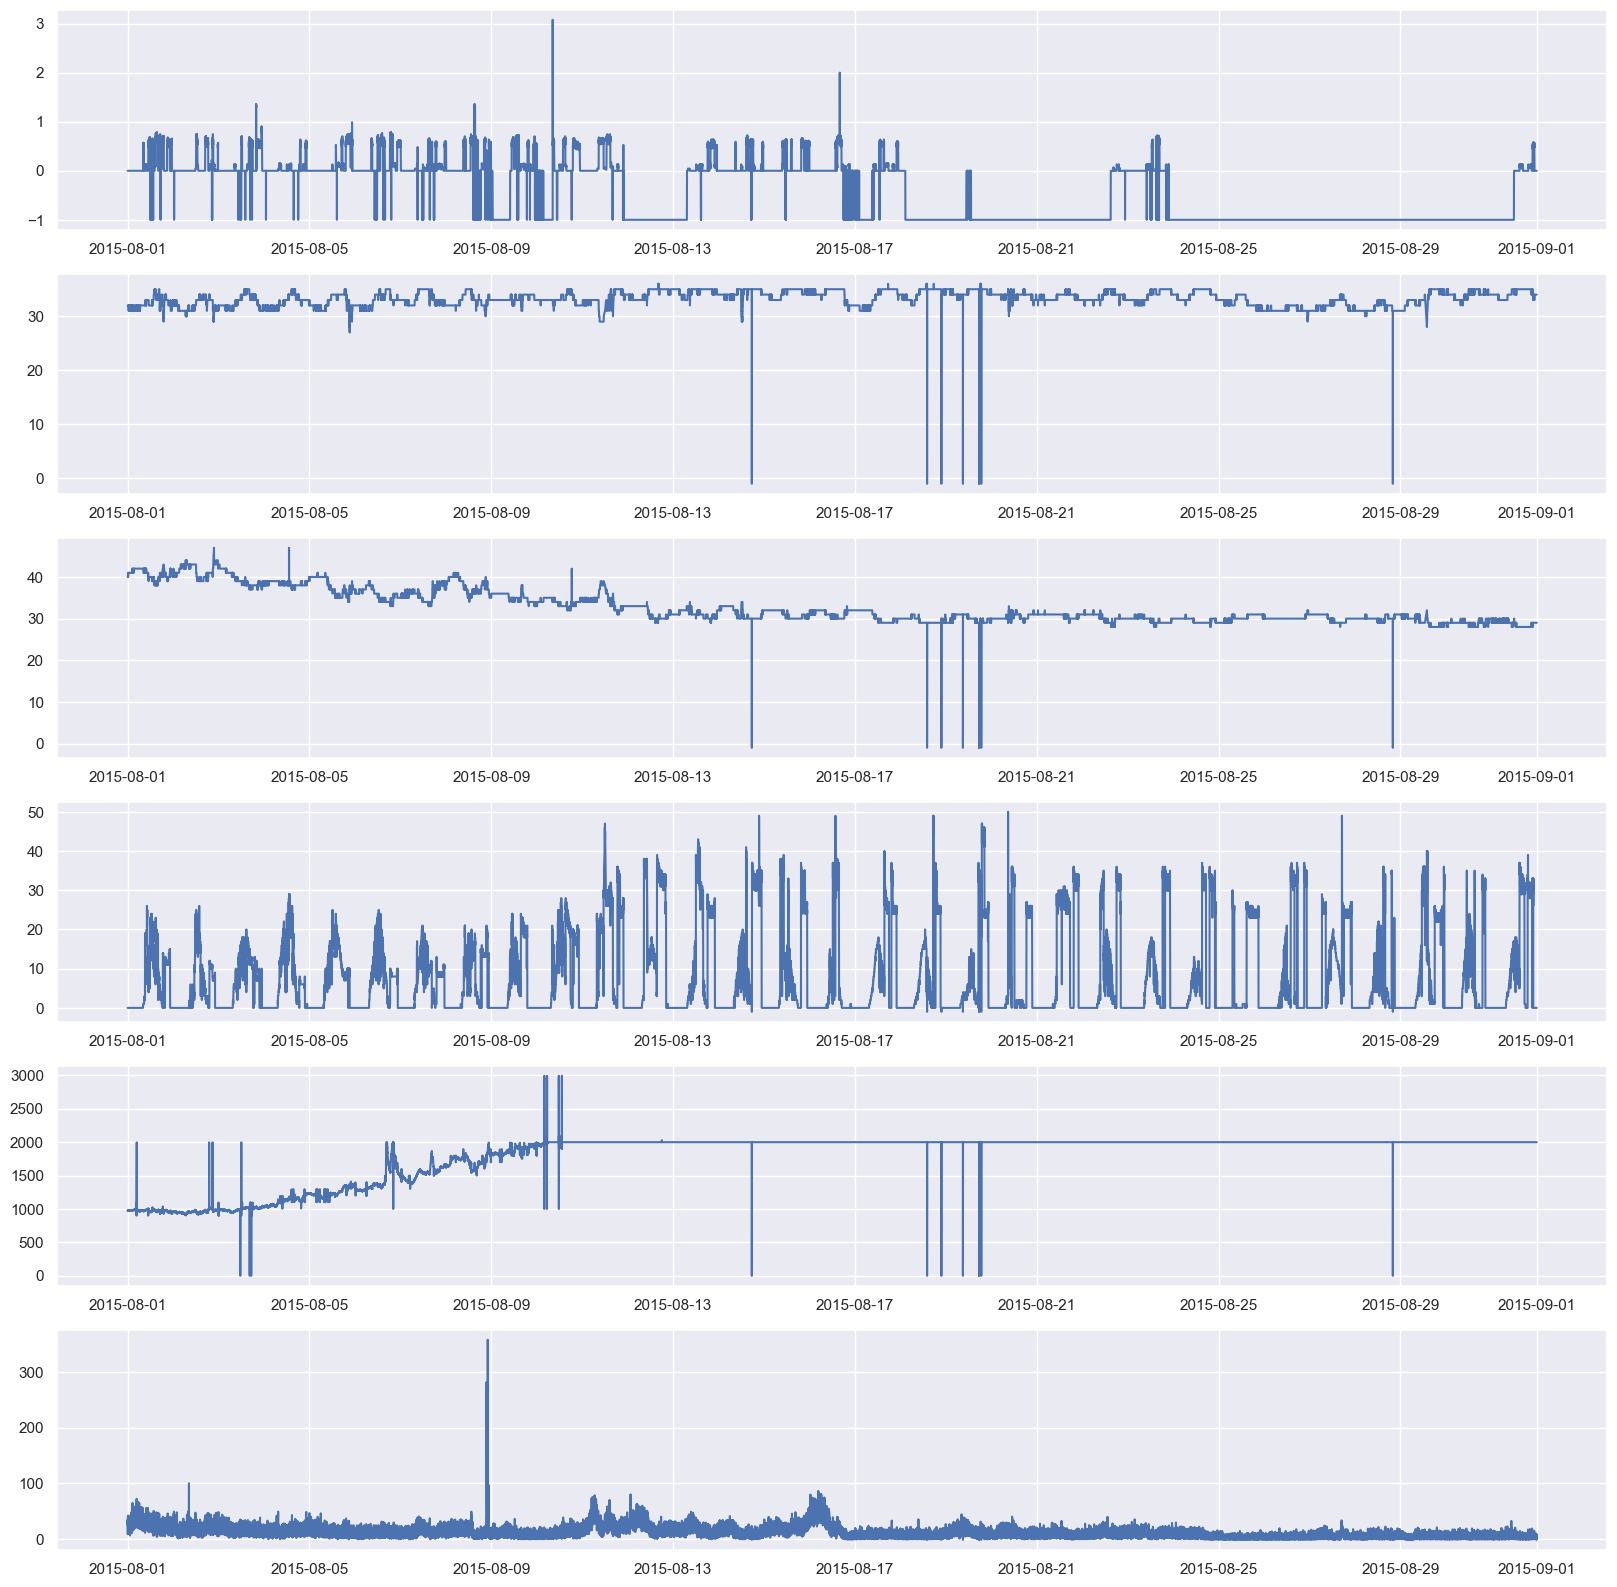

In [33]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(6, figsize=(20,20))
# fig.suptitle('Vertically stacked subplots')
ax1.plot(sensor_data.index, sensor_data['power'])
ax2.plot(sensor_data.index, sensor_data['temp'])
ax3.plot(sensor_data.index, sensor_data['humidity'])
ax4.plot(sensor_data.index, sensor_data['light'])
ax5.plot(sensor_data.index, sensor_data['CO2'])
ax6.plot(sensor_data.index, sensor_data['dust'])
plt.show()

## Média móvel

In [34]:
sensor_data['dust'].head(10)

time
2015-08-01 00:00:28    27.80
2015-08-01 00:00:58    27.09
2015-08-01 00:01:28    34.50
2015-08-01 00:01:58    28.43
2015-08-01 00:02:28    27.58
2015-08-01 00:02:59    29.35
2015-08-01 00:03:29    26.46
2015-08-01 00:03:59    23.35
2015-08-01 00:04:29    11.67
2015-08-01 00:04:59     9.06
Name: dust, dtype: float64

In [35]:
sensor_data['dust'].head(10).to_clipboard()

In [36]:
(27.80+27.09)/2

27.445

In [37]:
(34.50+27.09)/2

30.795

In [38]:
sensor_data['dust'].head(10).rolling(2).mean()

time
2015-08-01 00:00:28       NaN
2015-08-01 00:00:58    27.445
2015-08-01 00:01:28    30.795
2015-08-01 00:01:58    31.465
2015-08-01 00:02:28    28.005
2015-08-01 00:02:59    28.465
2015-08-01 00:03:29    27.905
2015-08-01 00:03:59    24.905
2015-08-01 00:04:29    17.510
2015-08-01 00:04:59    10.365
Name: dust, dtype: float64

<Axes: xlabel='time'>

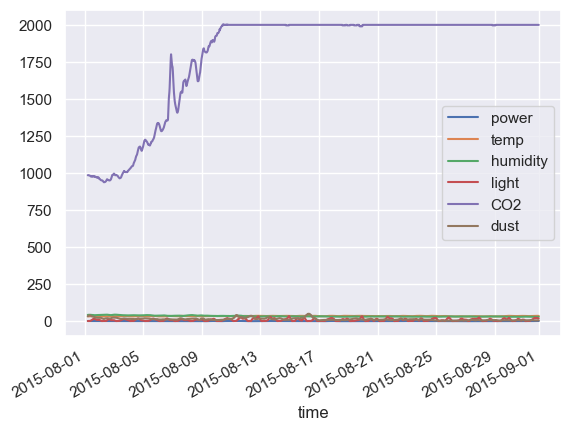

In [39]:
sensor_data.rolling(600).mean().plot()

<Axes: xlabel='time'>

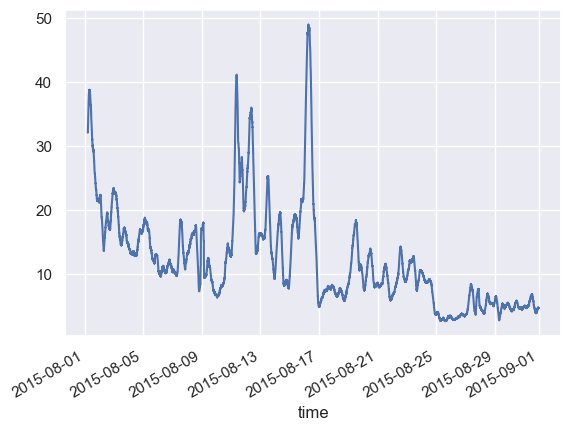

In [40]:
sensor_data.dust.rolling(600).mean().plot()

In [41]:
import seaborn as sns
sns.set()

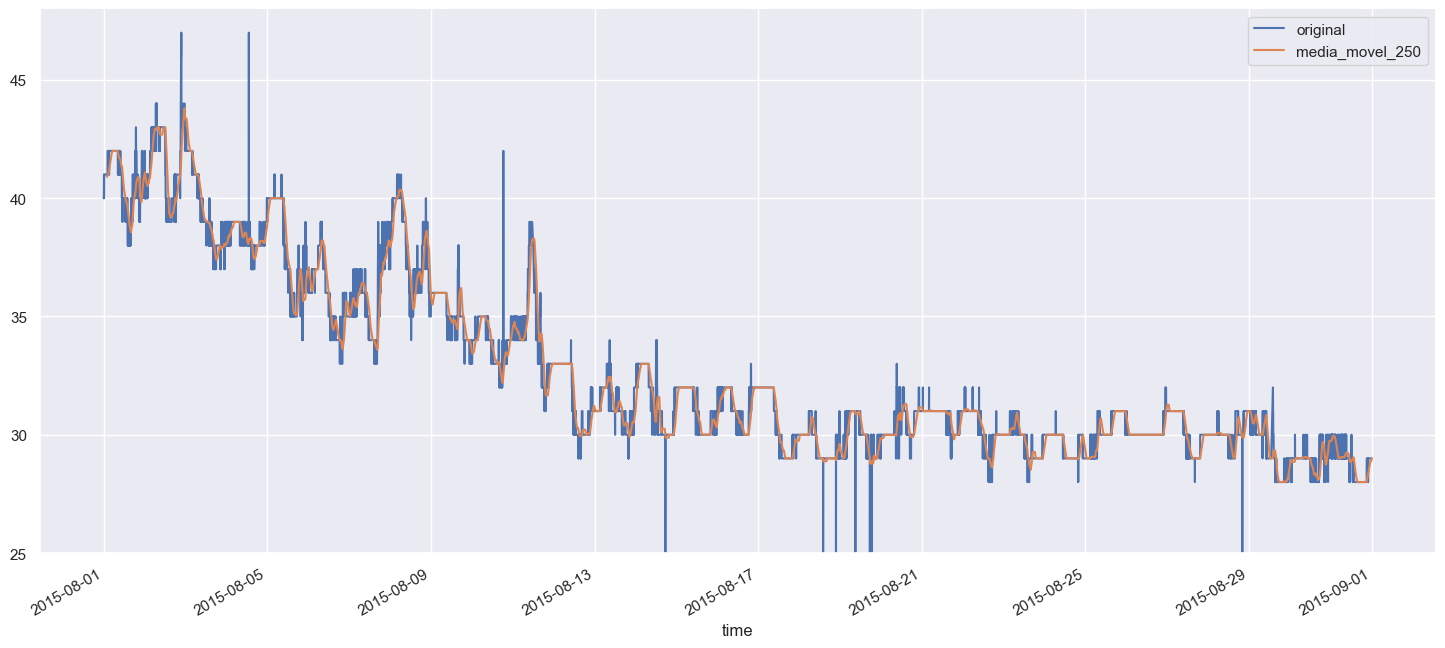

In [42]:
plt.figure(figsize=(18,8))
sensor_data.humidity.plot(label='original')
# sensor_data.humidity.rolling(10).mean().plot(label='media_movel_10')
sensor_data.humidity.rolling(250).mean().plot(label='media_movel_250')
# sensor_data.humidity.rolling(700).mean().plot(label='media_movel_700')
plt.legend()
plt.ylim(25, 48)
sns.despine()


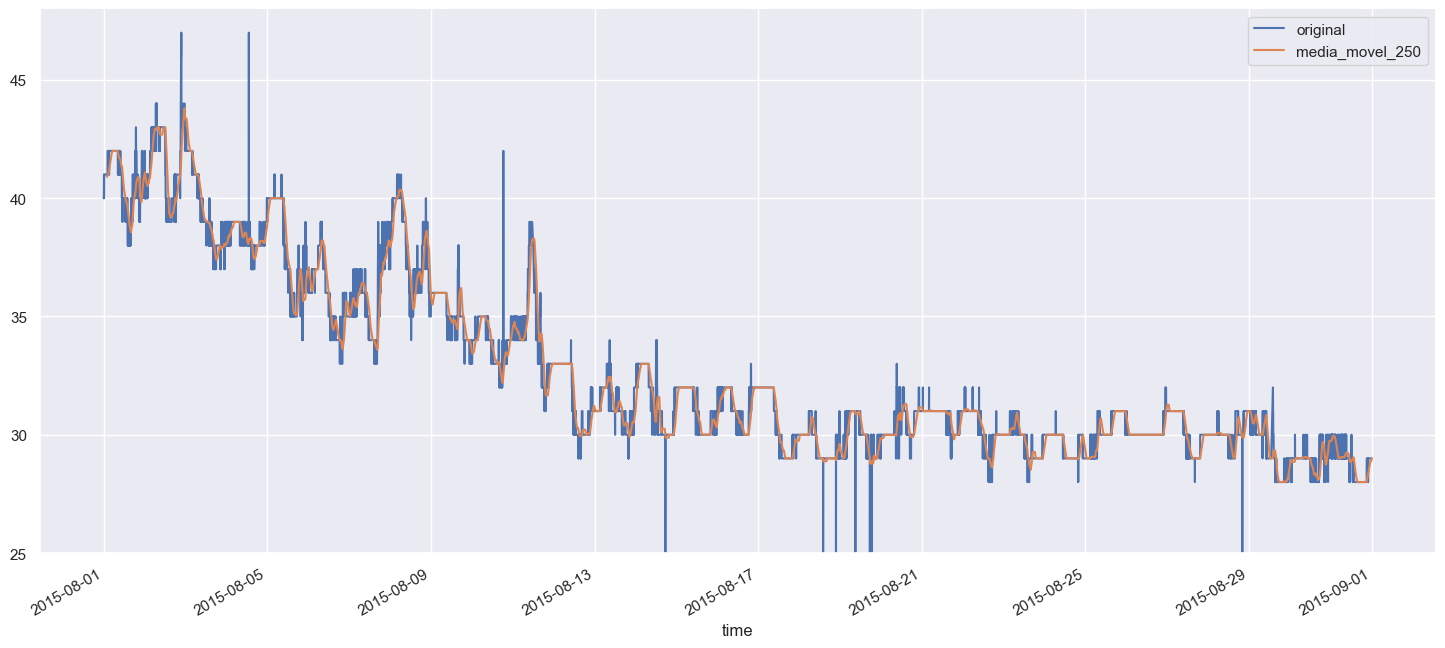

In [43]:
plt.figure(figsize=(18,8))
sensor_data.humidity.plot(label='original')
# sensor_data.humidity.rolling(10).mean().plot(label='media_movel_10')
sensor_data.humidity.rolling(250).mean().plot(label='media_movel_250')
# sensor_data.humidity.rolling(700).mean().plot(label='media_movel_700')
plt.legend()
plt.ylim(25, 48)
sns.despine()
os.makedirs('./img', exist_ok=True)
plt.savefig('./img/media_movel_dust.png')

# Redução da amostra (*Downsampling*)

In [44]:
sensor_data.head(300)

,power,temp,humidity,light,CO2,dust
time,,,,,,
2015-08-01 00:00:28,0.0,32,40,0,973,27.80
2015-08-01 00:00:58,0.0,32,40,0,973,27.09
2015-08-01 00:01:28,0.0,32,40,0,973,34.50
2015-08-01 00:01:58,0.0,32,40,0,973,28.43
2015-08-01 00:02:28,0.0,32,40,0,973,27.58
...,...,...,...,...,...,...
2015-08-01 02:28:31,0.0,32,41,0,980,40.67
2015-08-01 02:29:01,0.0,31,41,0,980,34.39
2015-08-01 02:29:31,0.0,32,41,0,983,31.39


In [45]:
sensor_data.head(300).resample('60min', closed='right').mean()

,power,temp,humidity,light,CO2,dust
time,,,,,,
2015-08-01 00:00:00,0.0,31.554622,40.798319,0.0,975.504202,26.522521
2015-08-01 01:00:00,0.0,31.316667,41.000000,0.0,976.283333,25.788417
2015-08-01 02:00:00,0.0,31.475410,41.065574,0.0,979.868852,33.271639


# Aumento da amostra (*Upsampling*)

In [46]:
sensor_data.head(10)

,power,temp,humidity,light,CO2,dust
time,,,,,,
2015-08-01 00:00:28,0.0,32,40,0,973,27.80
2015-08-01 00:00:58,0.0,32,40,0,973,27.09
2015-08-01 00:01:28,0.0,32,40,0,973,34.50
2015-08-01 00:01:58,0.0,32,40,0,973,28.43
2015-08-01 00:02:28,0.0,32,40,0,973,27.58
2015-08-01 00:02:59,0.0,32,40,0,971,29.35
2015-08-01 00:03:29,0.0,32,40,0,971,26.46
2015-08-01 00:03:59,0.0,32,40,0,971,23.35
2015-08-01 00:04:29,0.0,32,40,0,973,11.67


In [47]:
sensor_data.head(10).resample('10s').mean()

,power,temp,humidity,light,CO2,dust
time,,,,,,
2015-08-01 00:00:20,0.0,32.0,40.0,0.0,973.0,27.80
2015-08-01 00:00:30,NaN,NaN,NaN,NaN,NaN,NaN
2015-08-01 00:00:40,NaN,NaN,NaN,NaN,NaN,NaN
2015-08-01 00:00:50,0.0,32.0,40.0,0.0,973.0,27.09
2015-08-01 00:01:00,NaN,NaN,NaN,NaN,NaN,NaN
2015-08-01 00:01:10,NaN,NaN,NaN,NaN,NaN,NaN
2015-08-01 00:01:20,0.0,32.0,40.0,0.0,973.0,34.50
2015-08-01 00:01:30,NaN,NaN,NaN,NaN,NaN,NaN
2015-08-01 00:01:40,NaN,NaN,NaN,NaN,NaN,NaN


## Usando `.bfill()`

In [48]:
sensor_data.head(10).resample('10s').bfill()

,power,temp,humidity,light,CO2,dust
time,,,,,,
2015-08-01 00:00:20,0.0,32,40,0,973,27.80
2015-08-01 00:00:30,0.0,32,40,0,973,27.09
2015-08-01 00:00:40,0.0,32,40,0,973,27.09
2015-08-01 00:00:50,0.0,32,40,0,973,27.09
2015-08-01 00:01:00,0.0,32,40,0,973,34.50
2015-08-01 00:01:10,0.0,32,40,0,973,34.50
2015-08-01 00:01:20,0.0,32,40,0,973,34.50
2015-08-01 00:01:30,0.0,32,40,0,973,28.43
2015-08-01 00:01:40,0.0,32,40,0,973,28.43


## Usando `.ffill()`

In [49]:
sensor_data.head(10).resample('10s').ffill()

,power,temp,humidity,light,CO2,dust
time,,,,,,
2015-08-01 00:00:20,NaN,NaN,NaN,NaN,NaN,NaN
2015-08-01 00:00:30,0.0,32.0,40.0,0.0,973.0,27.80
2015-08-01 00:00:40,0.0,32.0,40.0,0.0,973.0,27.80
2015-08-01 00:00:50,0.0,32.0,40.0,0.0,973.0,27.80
2015-08-01 00:01:00,0.0,32.0,40.0,0.0,973.0,27.09
2015-08-01 00:01:10,0.0,32.0,40.0,0.0,973.0,27.09
2015-08-01 00:01:20,0.0,32.0,40.0,0.0,973.0,27.09
2015-08-01 00:01:30,0.0,32.0,40.0,0.0,973.0,34.50
2015-08-01 00:01:40,0.0,32.0,40.0,0.0,973.0,34.50


In [50]:
a= sensor_data.head(10).resample('10s')

In [51]:
sensor_data.head(10).resample('10s').mean()

,power,temp,humidity,light,CO2,dust
time,,,,,,
2015-08-01 00:00:20,0.0,32.0,40.0,0.0,973.0,27.80
2015-08-01 00:00:30,NaN,NaN,NaN,NaN,NaN,NaN
2015-08-01 00:00:40,NaN,NaN,NaN,NaN,NaN,NaN
2015-08-01 00:00:50,0.0,32.0,40.0,0.0,973.0,27.09
2015-08-01 00:01:00,NaN,NaN,NaN,NaN,NaN,NaN
2015-08-01 00:01:10,NaN,NaN,NaN,NaN,NaN,NaN
2015-08-01 00:01:20,0.0,32.0,40.0,0.0,973.0,34.50
2015-08-01 00:01:30,NaN,NaN,NaN,NaN,NaN,NaN
2015-08-01 00:01:40,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
(27.800+27.090)/2

27.445

In [53]:
sensor_data.head(10).resample('10s').bfill(limit=1).interpolate()

,power,temp,humidity,light,CO2,dust
time,,,,,,
2015-08-01 00:00:20,0.0,32.0,40.0,0.0,973.000000,27.800000
2015-08-01 00:00:30,0.0,32.0,40.0,0.0,973.000000,27.563333
2015-08-01 00:00:40,0.0,32.0,40.0,0.0,973.000000,27.326667
2015-08-01 00:00:50,0.0,32.0,40.0,0.0,973.000000,27.090000
2015-08-01 00:01:00,0.0,32.0,40.0,0.0,973.000000,29.560000
2015-08-01 00:01:10,0.0,32.0,40.0,0.0,973.000000,32.030000
2015-08-01 00:01:20,0.0,32.0,40.0,0.0,973.000000,34.500000
2015-08-01 00:01:30,0.0,32.0,40.0,0.0,973.000000,32.476667
2015-08-01 00:01:40,0.0,32.0,40.0,0.0,973.000000,30.453333


## Shift no dados

In [54]:
sensor_data['dust_1'] = sensor_data.dust.shift(+1)

In [55]:
sensor_data[['dust','dust_1']].head(15)

,dust,dust_1
time,,
2015-08-01 00:00:28,27.80,NaN
2015-08-01 00:00:58,27.09,27.80
2015-08-01 00:01:28,34.50,27.09
2015-08-01 00:01:58,28.43,34.50
2015-08-01 00:02:28,27.58,28.43
2015-08-01 00:02:59,29.35,27.58
2015-08-01 00:03:29,26.46,29.35
2015-08-01 00:03:59,23.35,26.46
2015-08-01 00:04:29,11.67,23.35
